## a. Import necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## b. Load training and testing data

In [2]:
train_data = pd.read_csv("E:/SEM_7/LP-4/Final_Practical/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv",header=None)
test_data = pd.read_csv("E:/SEM_7/LP-4/Final_Practical/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv",header=None)

C:\Users\pawar\AppData\Local\Temp\ipykernel_5544\1281899788.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
1,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
2,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
3,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
4,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4


In [5]:
train_data.drop(0,inplace=True)

In [6]:
x_train = train_data.drop(3072, axis=1)

In [7]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
2,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
3,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
4,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
5,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [8]:
y_train = train_data[3072]
y_train.head()

1    6
2    9
3    9
4    4
5    1
Name: 3072, dtype: object

In [9]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
1,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
2,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
3,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
4,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0


In [10]:
test_data.drop(0, inplace=True)
test_data

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
1,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
2,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
3,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
4,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
5,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9997,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9998,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9999,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [11]:
x_test = test_data.drop(3072, axis=1)
x_test

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
2,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
3,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
4,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
5,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,76,78,133,76,78,134,77,80,132,76,...,235,204,219,236,200,215,234,199,216,236
9997,81,57,43,91,69,53,98,75,63,106,...,173,155,139,129,171,167,147,167,164,160
9998,20,15,12,19,14,11,15,14,11,15,...,51,24,23,50,26,23,53,25,20,47
9999,25,40,12,15,36,3,23,41,18,17,...,78,93,124,80,95,123,81,92,120,80


In [12]:
y_test = test_data[3072]

In [13]:
y_test.head()

1    3
2    8
3    8
4    0
5    6
Name: 3072, dtype: object

In [14]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [17]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# y_train = y_train.astype("int32") / 255.0
# y_test = y_test.astype("int32") / 255.0
x_train.shape

(50000, 3072)

In [18]:
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train.astype("int32"))
y_test = lb.transform(y_test.astype("int32"))

## Model building

In [30]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,), activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [32]:
from keras.optimizers import Adam
sgd=SGD(0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])
h=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 3.8419e-07 - accuracy: 1.0000 - val_loss: 3.8290e-07 - val_accuracy: 1.0000
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8419e-07 - accuracy: 1.0000 - val_loss: 3.8288e-07 - val_accuracy: 1.0000
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8418e-07 - accuracy: 1.0000 - val_loss: 3.8288e-07 - val_accuracy: 1.0000
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8417e-07 - accuracy: 1.0000 - val_loss: 3.8286e-07 - val_accuracy: 1.0000
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8416e-07 - accuracy: 1.0000 - val_loss: 3.8285e-07 - val_accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8416e-07 - accuracy: 1.0000 - val_loss: 3.8284e-07 - val_accuracy: 1.0000
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 3.8414e-07 -

In [24]:
predictions = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



[]

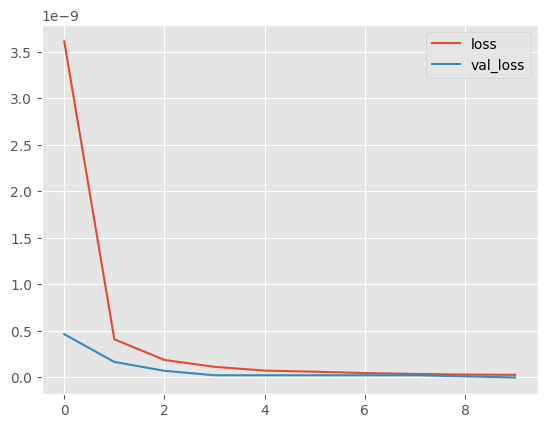

In [29]:
plt.style.use("ggplot")
plt.figure()

plt.plot(h.history["loss"],label="loss")
# np.arange(0,epochs),
plt.plot(h.history["val_loss"],label="val_loss")
# np.arange(0,epochs),
plt.legend()
plt.plot()